# Generate example dataset

Using our favour source, Chicago: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

Geometry from https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

In [1]:
import os, csv, lzma
import numpy as np
import open_cp.sources.chicago
import geopandas as gpd
import pyproj
import shapely.geometry

# Get our favourite, the southside

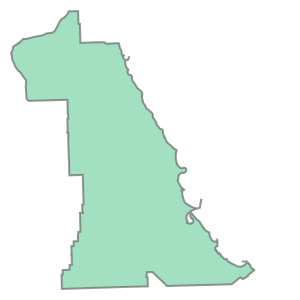

In [4]:
#datadir = os.path.join("/media", "OTHERDATA")
#datadir = os.path.join("..", "..", "..", "..", "Data")
datadir = os.path.join("..", "..", "Data")
open_cp.sources.chicago.set_data_directory(datadir)
polygon = open_cp.sources.chicago.get_side("South")
polygon

In [3]:
frame = gpd.GeoDataFrame({"name":["South Side"]})
frame.geometry = [polygon]
frame.crs = {"init":"epsg:2790"}
frame

name                                           geometry
0  South Side  POLYGON ((365647.3845872784 565208.9811670227,...

In [10]:
frame.to_file("SouthSide")

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


# Process the data

In [12]:
def gen(shortfilename="chicago.csv"):
    filename = os.path.join(datadir, shortfilename)
    if shortfilename.endswith(".csv.xz"):
        with lzma.open(filename, "rt") as f:
            yield from csv.reader(f)
    elif shortfilename.endswith(".csv"):
        with open(filename, "rt") as f:
            yield from csv.reader(f)
    else:
        yield None

#rows = gen("chicago_all_dec2017.csv.xz")
rows = gen("chicago.csv")
print(next(rows))
print(next(rows))

['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR', ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION', ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION']
['JB241987', '04/28/2018 10:05:00 PM', '009XX N LONG AVE', '2092', 'NARCOTICS', 'SOLICIT NARCOTICS ON PUBLICWAY', 'SIDEWALK', 'Y', 'N', '1524', '37', '18', '1140136', '1905903', '41.897894893', '-87.760743714', '(41.897894893, -87.760743714)']


In [16]:
proj = pyproj.Proj({"init":"epsg:2790"})
rows = gen()
header = next(rows)
choices = []
for row in rows:
    print(row)
    print(len(row))
    break
    if row[19] is "":
        continue
    if row[2][6:10] != "2016":
        continue
    x, y = proj(float(row[20]), float(row[19]))
    pt = shapely.geometry.Point(x, y)
    if polygon.intersects(pt):
        choices.append(row)

['JB241987', '04/28/2018 10:05:00 PM', '009XX N LONG AVE', '2092', 'NARCOTICS', 'SOLICIT NARCOTICS ON PUBLICWAY', 'SIDEWALK', 'Y', 'N', '1524', '37', '18', '1140136', '1905903', '41.897894893', '-87.760743714', '(41.897894893, -87.760743714)']
17


In [ ]:
want = np.sort(np.random.choice(len(choices), 1000, replace=False))
row = next(gen())
out = []
out.append([row[1], row[2], row[3], row[5], row[19], row[20]])
for i, row in enumerate(choices):
    if i in want:
        out.append([row[1], row[2], row[3], row[5], row[19], row[20]])

In [ ]:
with open("example.csv", "w", newline="") as f:
    csv.writer(f).writerows(out)